In [1]:
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import data

2022-12-05 01:57:10.890329: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 01:57:10.971450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 01:57:10.972280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
train_data = pd.read_csv("data/embeddings/train_dim_32.csv")

In [3]:
train_data = data.preprocess(train_data, create_keywords=True)

In [4]:
train_data = data.feature_words_arr(train_data)
train_data = data.feature_delete_stop_words(train_data, column="text_without_stopwords")

In [5]:
train_data = data.feature_sent_analysis(train_data, "text_without_stopwords")

In [6]:
display(train_data.sort_values('polarity'))

,Unnamed: 0,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,...,day,hour,Macron,Zemmour,Melenchon,rt,text_arr,text_without_stopwords,polarity,subjectivity
291429,291429,macron laxiste prenez imbéciles,0,0,898,58829,1213,[],[],0,...,19,11,True,False,False,False,"[macron, laxiste, prenez, imbéciles]",macron laxiste prenez imbéciles,-1.0,1.0
190046,190046,connais prend électeurs imbéciles promesses dé...,3,2,5958,54948,936,[],['https://t.co/kvl1klagze'],0,...,16,12,False,False,False,False,"[connais, prend, électeurs, imbéciles, promess...",connais prend électeurs imbéciles promesses dé...,-1.0,1.0
275270,275270,rfi france franchement déçu infos sauvé macron...,2,0,1122,1348,97,[],[],0,...,15,22,True,False,False,False,"[rfi, france, franchement, déçu, infos, sauvé,...",rfi france franchement déçu infos sauvé macron...,-1.0,1.0
339475,339475,pathétique programmes amené mur regardez zemmo...,0,0,114,2665,147,[],['https://t.co/beovnonpnu'],0,...,11,3,False,True,False,False,"[pathétique, programmes, amené, mur, regardez,...",pathétique programmes amené mur regardez zemmo...,-1.0,1.0
95783,95783,pathétiques tombent pâmoison,0,0,443,81566,484,[],[],0,...,14,20,False,False,False,False,"[pathétiques, tombent, pâmoison]",pathétiques tombent pâmoison,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10554,10554,rt superbe discours mr zemmour,1,0,1838,9150,2081,[],[],0,...,14,20,False,True,False,True,"[rt, superbe, discours, mr, zemmour]",rt superbe discours mr zemmour,1.0,1.0
113339,113339,magnifique moment soignants,1,0,1261,1333,1880,[],[],0,...,19,9,False,False,False,False,"[magnifique, moment, soignants]",magnifique moment soignants,1.0,1.0
113294,113294,magnifique action homme zemmour fils pute,1,0,537,22901,666,[],[],0,...,19,19,False,True,False,False,"[magnifique, action, homme, zemmour, fils, pute]",magnifique action homme zemmour fils pute,1.0,1.0
341621,341621,fantastique donne frissons zemmour président,0,0,1660,11845,3132,[],[],0,...,18,19,False,True,False,False,"[fantastique, donne, frissons, zemmour, présid...",fantastique donne frissons zemmour président,1.0,1.0


In [7]:
# select useful columns
train_data_filtered = train_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID",
                                       "text_arr", "text_without_stopwords"], axis=1)

In [8]:

# train_data_filtered = train_data.loc[:, ["retweets_count","favorites_count","followers_count","statuses_count","friends_count",
#                                  "hashtags_count","hour","verified","url_count","text_len","rt","Macron","Zemmour","Melenchon"]]


X_train, X_eval, y_train, y_eval = train_test_split(train_data_filtered.drop("retweets_count", axis=1),
                                                    train_data_filtered["retweets_count"],
                                                    random_state=42, test_size=0.1)

# Standardize the data
normal_columns = train_data_filtered.drop(["hour", "verified", "Macron", "Zemmour", "Melenchon", "url_count", "rt", "retweets_count", "subjectivity", "polarity"], axis=1).columns
mu, sigma = X_train[normal_columns].mean(axis=0), X_train[normal_columns].std(axis=0)
X_train.loc[:, normal_columns] = (X_train[normal_columns] - mu) / sigma
X_eval.loc[:, normal_columns] = (X_eval[normal_columns] - mu) / sigma

In [9]:
display(X_train)

,Unnamed: 0,favorites_count,followers_count,statuses_count,friends_count,verified,0,1,2,3,...,text_len,hashtags_count,day,hour,Macron,Zemmour,Melenchon,rt,polarity,subjectivity
286184,1.068821,-0.055089,-0.077844,-0.421579,-0.525943,0,-0.193646,-0.390449,-0.628279,-0.815116,...,-0.456928,-0.384757,0.177303,19,False,False,False,False,0.000000,0.000000
83577,-0.913831,-0.055089,-0.067811,-0.070867,0.325185,0,0.573461,-1.151213,-0.235650,0.354275,...,0.624187,-0.384757,0.177303,8,False,False,False,False,0.230000,0.166667
165861,-0.108625,-0.055089,-0.077714,-0.417499,-0.523552,0,-0.664723,-0.227792,0.317779,-0.637389,...,-0.601077,-0.384757,-0.728852,17,False,False,False,False,0.000000,0.000000
314938,1.350199,-0.045624,-0.071025,-0.322850,-0.292042,0,1.317721,-0.680656,1.216199,-1.090109,...,0.431989,-0.384757,0.479354,13,False,False,False,False,-0.305000,0.575000
301981,1.223405,-0.052722,-0.076427,-0.310814,-0.221115,0,-0.023342,0.411124,1.082628,0.314276,...,1.945550,2.208030,-1.030903,5,False,False,False,False,0.130000,0.265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.558591,-0.055089,-0.074569,-0.374245,-0.252993,0,0.702779,1.075933,0.649906,-1.561759,...,-0.216681,-0.384757,1.385508,9,False,False,False,False,0.000000,0.000000
259178,0.804548,-0.055089,-0.067190,-0.409402,-0.420349,0,-0.495153,0.120018,0.266189,0.709652,...,-0.384854,-0.384757,0.177303,16,True,False,False,False,-0.300000,0.500000
131932,-0.440644,-0.055089,-0.062559,-0.417992,0.397706,0,-0.867030,0.442542,0.028644,0.881844,...,0.480038,-0.384757,0.781405,17,False,False,False,False,0.000000,0.000000
146867,-0.294494,-0.055089,-0.076515,-0.175583,-0.372135,0,2.051853,-3.958607,-0.422013,0.039019,...,1.705302,-0.384757,-0.426800,9,False,True,False,False,0.650000,0.600000


In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1),
])

2022-12-05 01:58:37.905443: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 01:58:37.906268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 01:58:37.907175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 01:58:37.907801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [12]:
# import tensorflow_addons as tfa
# optimizer = tfa.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)
# model.compile(optimizer=optimizer, loss='mae')

In [13]:
model.compile(optimizer="adam", loss='mae')

In [18]:
history = model.fit(X_train.values.astype(np.float32), y_train.values.astype(np.float32), epochs=20, batch_size=1024,
         validation_data=(X_eval.values.astype(np.float32), y_eval.values.astype(np.float32)), shuffle=True)

Epoch 1/20
 33/312 [==>...........................] - ETA: 0s - loss: 5.0751

2022-12-05 02:03:11.568171: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62440112 exceeds 10% of free system memory.


312/312 [==============================] - 1s 3ms/step - loss: 5.7285 - val_loss: 5.7725
Epoch 2/20
312/312 [==============================] - 1s 3ms/step - loss: 5.7339 - val_loss: 5.7161
Epoch 3/20
312/312 [==============================] - 1s 3ms/step - loss: 5.7306 - val_loss: 5.7835
Epoch 4/20
312/312 [==============================] - 1s 4ms/step - loss: 5.7360 - val_loss: 5.7866
Epoch 5/20
312/312 [==============================] - 1s 3ms/step - loss: 5.7229 - val_loss: 5.8119
Epoch 6/20
312/312 [==============================] - 1s 3ms/step - loss: 5.7345 - val_loss: 5.7075
Epoch 7/20
312/312 [==============================] - 1s 4ms/step - loss: 5.7389 - val_loss: 5.6852
Epoch 8/20
312/312 [==============================] - 1s 4ms/step - loss: 5.7352 - val_loss: 5.7693
Epoch 9/20
312/312 [==============================] - 1s 3ms/step - loss: 5.7245 - val_loss: 5.7754
Epoch 10/20
312/312 [==============================] - 1s 4ms/step - loss: 5.7313 - val_loss: 5.6811
Epoch 11/2

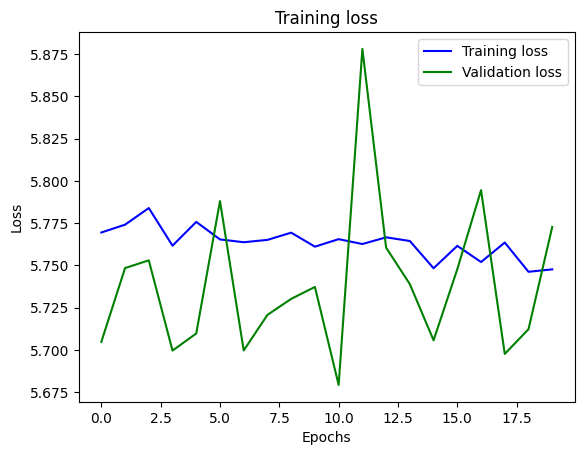

In [17]:
plt.plot(history.epoch, history.history["loss"], 'b', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_eval.values.astype(np.float32),  y_eval.values.astype(np.float32), verbose=2)

In [ ]:
pred = model.predict(X_train.values.astype(np.float32))
print(pred)

In [ ]:
# plt.scatter(X_train["favorites_count"], model.predict(X_train))
# plt.scatter(X_train["favorites_count"], y_train.values.astype(np.float32))

In [ ]:
# evaluation

eval_data = pd.read_csv("data/embeddings/evaluation_dim_32.csv")
tweets = eval_data["TweetID"]

In [ ]:
eval_data["url_count"] = eval_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["text_len"] = eval_data["text"].apply(lambda s: len(s))
eval_data["hashtags_count"] = eval_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["day"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
eval_data["hour"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)
eval_data["Macron"] =  eval_data["text"].apply(lambda s: ("macron" in s.lower().split()))
eval_data["Zemmour"] =  eval_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
eval_data["Melenchon"] =  eval_data["text"].apply(lambda s: ("melenchon" in s.lower().split()))
eval_data["rt"] =  eval_data["text"].apply(lambda s: ("rt" in s.lower().split()))

# print("sentiment analysis...")
# eval_data["compound"] =  eval_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

eval_data = eval_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID"], axis=1)

# normalize
eval_data.loc[:, normal_columns] = (eval_data.loc[:, normal_columns] - mu) / sigma

print(eval_data)

pred = model.predict(eval_data.values.astype(np.float32))

print(pred)

# output normalization
for i,p in enumerate(pred):
    if p<0: pred[i] = 0

In [ ]:
with open("data/predictions.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["TweetID", "retweets_count"])
    for index, prediction in enumerate(pred):
        writer.writerow([str(tweets[index]) , str(int(prediction))])